In [14]:
## Load invasive cancer

import numpy as np
import matplotlib.pyplot as plt


import pandas as pd

import json
import os 

# Load configuration
with open("../../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

import gzip 
import pickle

with gzip.open("../../results/TNBC/compute_patches/all/patches_info.pkl.gz") as f:
    patches_info = pickle.load(f)

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

df = pd.read_csv(os.path.join(config["retrained_benchmark_folder2"], 
                              "invasive_cancer_clustering", 
                              "kmeans", 
                              "uni_full_koleo_4096_prototypes", 
                              "invasive_labels_6_clusters_umap_min_dist_0.001_n_neighbors_100.csv"), index_col=0)

In [21]:
with open(os.path.join(config["retrained_benchmark_folder2"], 
                              "invasive_cancer_clustering", 
                              "kmeans", 
                              "uni_full_koleo_4096_prototypes", 
                              "representative_patches_6_clusters_umap.json")) as f:
    representative_patches = json.load(f)

In [41]:
def look_at_spot(spot_name, patches_info):
    info_patch = [patch for patch in patches_info if spot_name in patch["name"]][0]
    slide_name = info_patch["path_origin"].split("/")[-1].split(".")[0]
    annotated_slide = f"/storage/research/dbmr_luisierlab/database/ST_TNBC_v3/Images/imageAnnotations/{slide_name}.png"
    slide = f"/storage/research/dbmr_luisierlab/database/ST_TNBC_v3/Images/imagesLarge/{slide_name}.jpg"
    # slide_hd = f"/storage/research/dbmr_luisierlab/database/ST_TNBC_v3/Images/imagesHD/{slide_name}.jpg"
    img = Image.open(slide)
    annotated = Image.open(annotated_slide).convert("RGB").resize((9523, 9523))

    if "TNBC78" in spot_name:
        print("Rotating TNBC78")
        annotated = np.rot90(annotated, k=-1)

    if "TNBC92" in spot_name:
        print("Rotating TNBC92")
        annotated = np.rot90(annotated, k=2)

    # img_hd = Image.open(slide_hd)
    factor = 10 / 3
    patch_low_res_x = info_patch["start_width_origin"] / factor
    patch_low_res_y = info_patch["start_height_origin"] / factor
    patch_size = int(252 / factor)


    plt.figure()

    plt.subplot(1, 2, 1)
    img_arr = np.array(img)
    # Calculate crop indices
    x_start = int(patch_low_res_x)
    y_start = int(patch_low_res_y)
    x_end = x_start + patch_size
    y_end = y_start + patch_size
    plt.title("Low resolution")

    # Use numpy slicing to extract the region
    cropped_arr = img_arr[y_start:y_end, x_start:x_end]
    plt.imshow(cropped_arr)

    plt.subplot(1, 2, 2)
    img_arr = np.array(annotated)
    # Calculate crop indices
    x_start = int(patch_low_res_x)
    y_start = int(patch_low_res_y)
    x_end = x_start + patch_size
    y_end = y_start + patch_size
    plt.title("Annotated")

    # Use numpy slicing to extract the region
    cropped_arr = img_arr[y_start:y_end, x_start:x_end]
    plt.imshow(cropped_arr)
    plt.suptitle(spot_name, weight="bold")


In [44]:
## Cluster 0
invasive_cancer_cluster_0 = df[df["predicted_label"] == 0]
invasive_cancer_cluster_5 = df[df["predicted_label"] == 5]

Rotating TNBC78
Rotating TNBC78


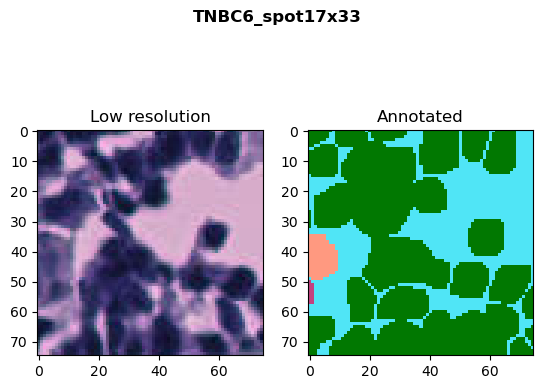

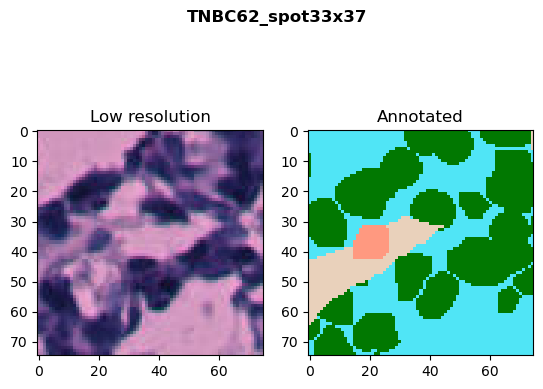

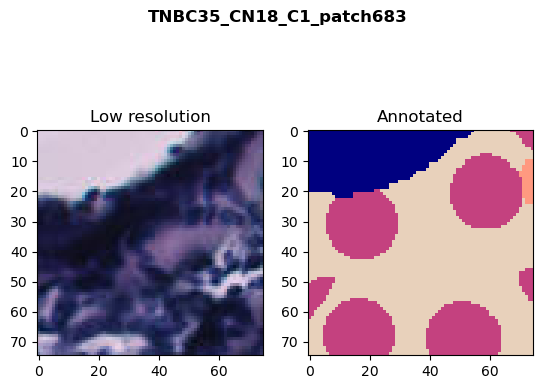

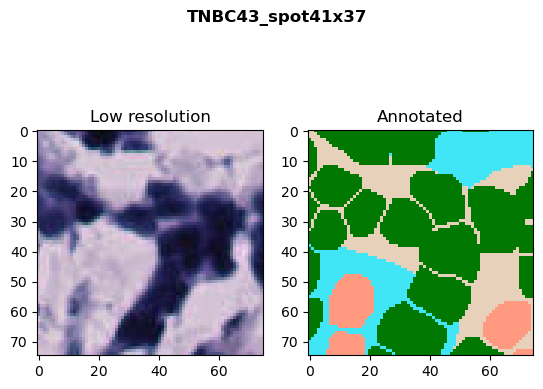

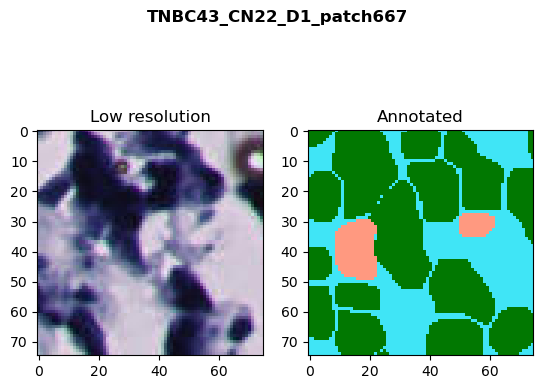

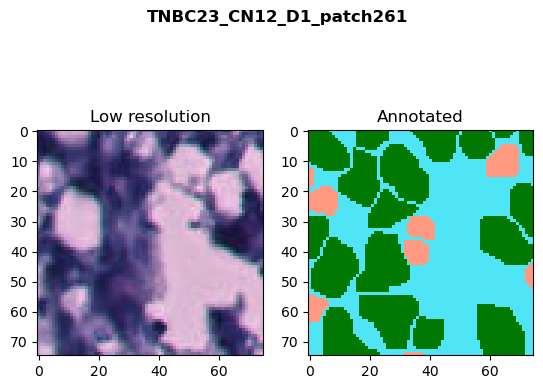

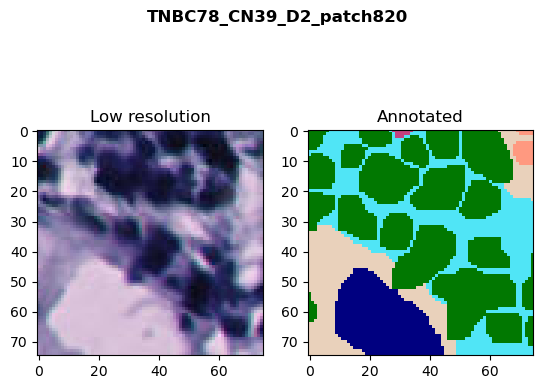

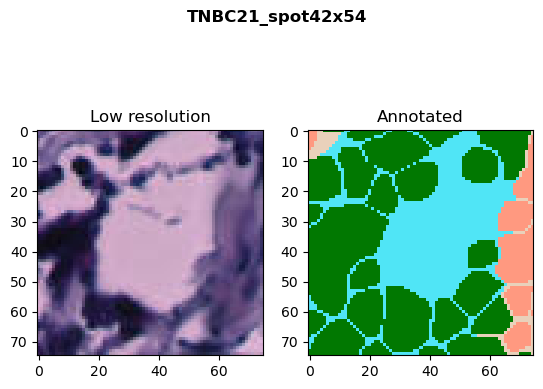

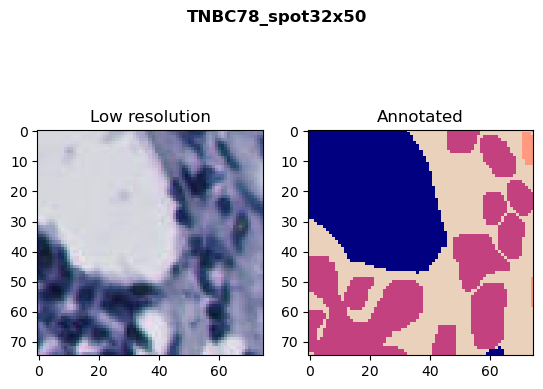

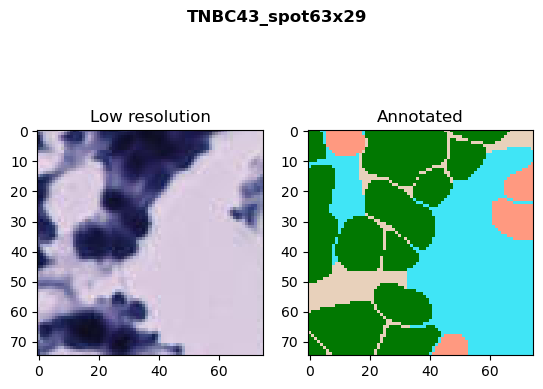

In [43]:
for spot_name in representative_patches["0"]:
    look_at_spot(spot_name, patches_info)


Rotating TNBC92


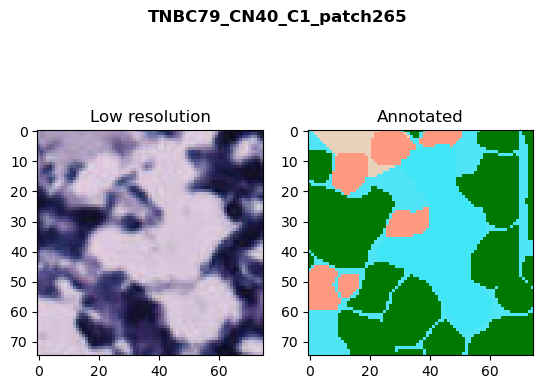

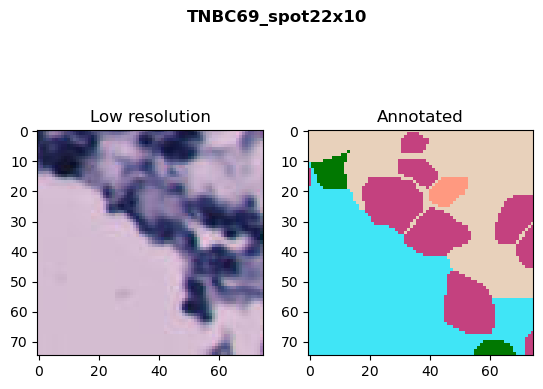

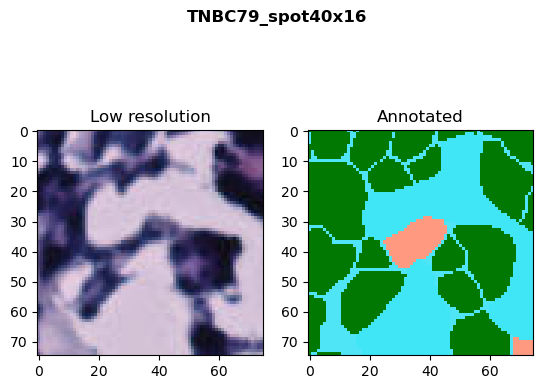

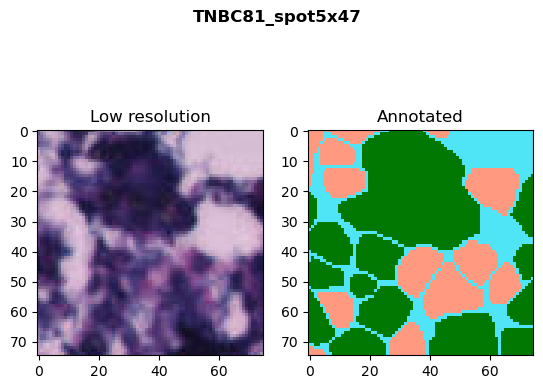

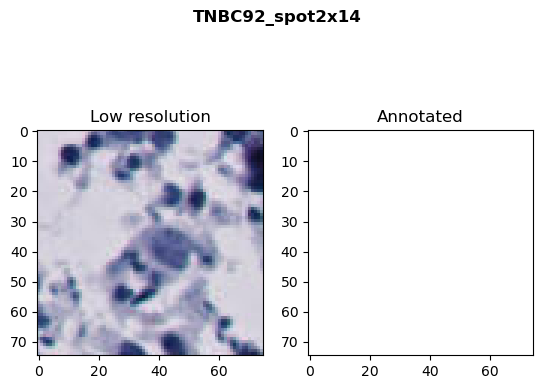

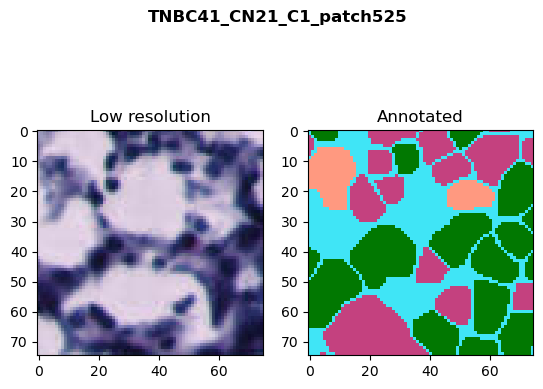

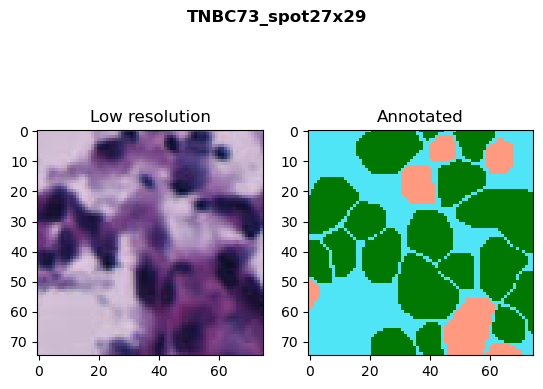

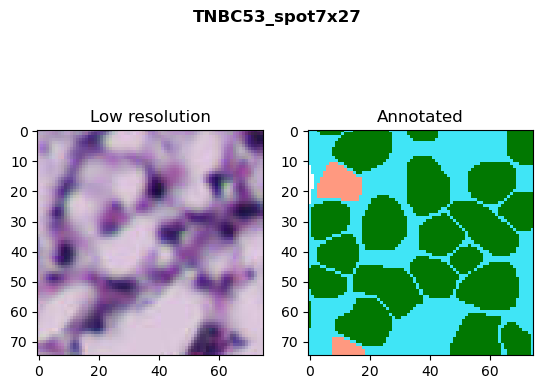

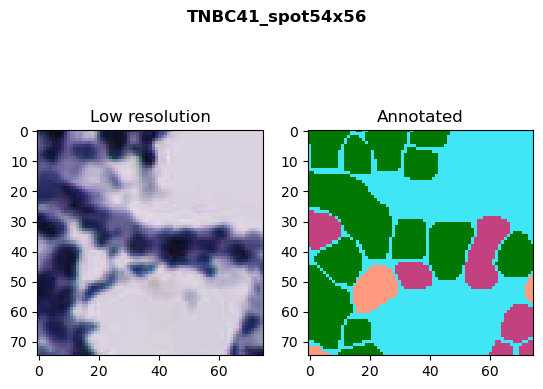

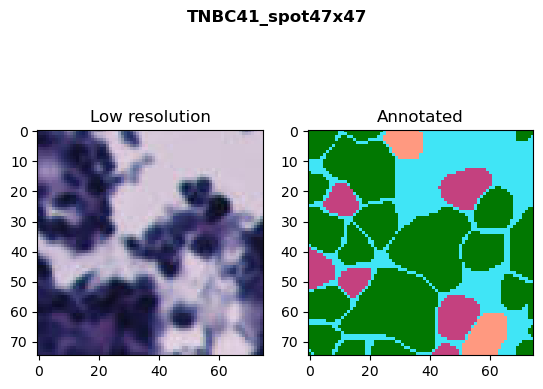

In [45]:
for spot_name in representative_patches["5"]:
    look_at_spot(spot_name, patches_info)